# **Author: Nico Grisouard, nicolas.grisouard@physics.utoronto.ca**

*Supporting textbook chapters for week 11: Chapter 10.3*

<font size="32">**Fill out the online evaluations!!!**</font>

Week 10, topics:
* Monte Carlo simulation

* Python's (pseudo) random number generator is the Mersenne Twister
* Transformation of distributions, e.g., for uniformly distributed distribution $p(x)=a\exp(-ax)$ obtained from
$$x = -\frac{1}{a}\ln(1-z).$$
* Monte Carlo integration:
    * when functions are pathological (fast variations),
    * when integrating over a lot of dimensions,
    * when integration domains are complicated.

**Importance sampling**

* Hit or Miss integration and mean value method have errors that vary as  $N^{-1/2}$
* Importance sampling chooses weights that favour largest integration values:
$$I = \int_a^b f(x)\text dx = \left<\frac{f(x)}{w(x)}\right>_w \int_a^b w(x)\text dx,$$

$$\left<\frac{f(x)}{w(x)}\right>_w = \frac{\int_a^b\left[\frac{f(x)}{w(x)}\right]w(x)\text dx}{\int_a^b w(x)\text dx} \approx \frac1N \sum_{i=1}^N\frac{f(x_i)}{w(x_i)},$$

<font size="32">**Fill out the online evaluations!!!**</font>

# Monte Carlo simulations

## Statistical mechanics: a review

* For a system in equilibrium at temperature $T$ (canonical ensemble), the probability of finding the system in any particular microstate $i$ is given by:
$$P(E_i) = \frac{\exp\left[-E_i/(k_B T)\right]}{Z}, \quad Z = \sum_{i=1}^{ALL}\exp\left[-E_i/(k_B T)\right]$$
where $E_i$ is the energy of state $i$, and $k_B$ is Boltzmann's constant.

* System undergoes transitions between microstates with probability of being in a particular microstate $P(E_i)$ 
* To calculate a macroscopic property during a measurement (total energy, magnetization...) $\Rightarrow$ average over the many microstates that the system visits during the measurement.

* If we want to measure a quantity "$X$" over the macrostate:
    $$\left<X\right> = \sum_{i=1}^{ALL}X_i P(E_i)$$
    where $X_i$ is the value of the quantity in the $i^\text{th}$ microstate and $P$ is the probability of finding the system in that microstate. 

* Simple example: single mole of gas has $10^{23}$ molecules.
    Assume each molecule had only 2 possible quantum states (gross underestimation), then the total number of microstates of the mole of gas is $2^{10^{23}}$, which is huge.

## Monte Carlo simulation in Stat. Mech.

### Setting the problem

* Huge number of terms in sum $\Rightarrow$ use Monte Carlo summation  
* Randomly sample the terms in the sum and only use those as an estimate. Replace:
    $$\left<X\right> = \sum_{i=1}^{ALL}X_i P(E_i)$$
* with a sum over $N$ randomly sampled microstates:
    $$\left<X\right> = \frac{\sum_{i=1}^{N}X_i P(E_i)}{\sum_{i=1}^{N}P(E_i)}$$
* the denominator is needed to ensure the total probability over the sampled states is 1.

* It is only worth keeping the big terms in the sum if we want to compute this:
    $$\left<X\right> = \sum_{i=1}^{ALL}X_i P(E_i)$$
* There are a lot of states with $P(E_i)$ really small, with $E_ i \gg k_B T$, which is the case for most of the states:
    $$P(E_i) = \frac{\exp\left[-E_i/(k_B T)\right]}{Z}$$
* To get a good estimate for the sum, need to preferentially choose terms where the integrand is non-negligible.
* So we should use importance sampling!

### Importance sampling

* For an integral
$$I = \int_a^b f(x)\text dx = \left<\frac{f(x)}{w(x)}\right>_w \int_a^b w(x)\text dx \approx \frac1N \sum_{i=1}^N\frac{f(x_i)}{w(x_i)}\int_a^b w(x)\text dx,$$
* For a sum:
$$\left<X\right> = \sum_{i=1}^{N}X_i P(E_i) \approx \frac1N \sum_{k=1}^{N}\frac{X_k P(E_k)}{w_k} \sum_{i=1}^{ALL}w_i.$$
* What to choose for weight $w$ to reduce the variance?
* $P(E_i)$ of course!
$$\left<X\right> \approx \frac1N \sum_{k=1}^{N}\frac{X_k P(E_k)}{P(E_k)} \sum_{i=1}^{ALL}P(E_i).$$

$$\left<X\right> \approx \frac1N \sum_{k=1}^{N}\frac{X_k P(E_k)}{P(E_k)} \sum_{i=1}^{ALL}P(E_i).$$
* Cancel out the $P(E_k)$'s in the first sum:
$$\left<X\right> \approx \frac1N \sum_{k=1}^{N}X_k \sum_{i=1}^{ALL}P(E_i).$$
* Sum over all $P(E_i)$'s is one $\displaystyle \Rightarrow \left<X\right> \approx \frac1N \sum_{k=1}^{N} X_k.$
* Looks simple but recall that the $X_k$'s are drawn from non-uniform distribution: we randomly choose terms in the sum based on their Boltzmann probabilities.

* One thing left to deal with: How do we pick states with probability $P(E_k)$? Recall:
    $$P(E_i) = \frac{\exp\left[-E_i/(k_B T)\right]}{Z}, \quad Z = \sum_{i=1}^{ALL}\exp\left[-E_i/(k_B T)\right]$$

* To do it this way, we need $Z$, which is a sum over all states. But if we could do this, we wouldn't need Monte Carlo in the first place!

### Markov chain method

Wikipedia (https://en.wikipedia.org/wiki/Markov_chain)
> A Markov chain is a stochastic model describing a sequence of possible events in which the probability of each event depends only on the state attained in the previous event. [...] (sometimes characterized as "memorylessness"). Roughly speaking, a process satisfies the Markov property if one can make predictions for the future of the process based solely on its present state just as well as one could knowing the process's full history, hence independently from such history; i.e., conditional on the present state of the system, its future and past states are independent. 

* much broader than Newman lets it appear!
* Random walks (Brownian motion) are Markov chains.
* Here: events are jumps in energy states, one after another.

* Solution: Use the Markov chain method.
    * Text goes into details on how to implement this method with a Metropolis algorithm.
    * Crucial key: Metropolis does not compute probability to be in one state, but probability to transition between two states ($Z$ cancels out in the process).
    * I will summarize it algorithmically...

![No, not this one either... https://en.wikipedia.org/w/index.php?curid=8913129](Metropolisposter.jpg)

1. Choose a random starting state $i$
2. Calculate the energy of that state $E_i$
3. Choose a transition to a new state $j$ uniformly at random from allowed set
4. Calculate the energy of this new state, $E_j$
5. Calculate the acceptance probability for this transition:
    * $P_a = 1\qquad\qquad \qquad \qquad \text{if}\ E_j \leq E_i$ (always accept a lower energy state)
    * $\displaystyle P_a = \exp\left(-\frac{E_j - E_i}{k_B T}\right) \quad \text{if}\ E_j > E_i$ (sometimes accept a higher energy state, more often for hight $T$).
6. Accept/reject the move according to the acceptance probability
7. Measure the quantity $X$ you want in its current state (new or old $i$) & store it
8. Repeat from step 2.


* How to implement the probability of the event in the previous slide?
    * $P_a = 1\qquad\qquad \qquad \qquad \text{if}\ E_j \leq E_i$ (always accept a lower energy state)
    * $\displaystyle P_a = \exp\left(-\frac{E_j - E_i}{k_B T}\right) \quad \text{if}\ E_j > E_i$ (sometimes accept a higher energy state, more often for hight $T$).

* Draw a random number in $[0,1)$. The statement

    `if random() < exp(-(Ej-Ei)/kT):`

    will introduce what to do if the move is accepted (`elif` will introduce what to do if rejected).
* E.g., at very high $T$, $\exp \approx 1$ and almost all moves are accepted.
* If $E_j \leq E_i$, then $\exp \geq 1$ and the move is accepted.

## Example: Ising model

### Das Spiel

* Simple model of ferromagnetism, but demonstrates many of the physical characteristics of fancier models.
* Assume an object is made up of a collection of dipoles (e.g. electron spins) and the net magnetization is the sum of the magnetization of all the spins
* Ising model: 
    * assume the spins can only point up or down.
    * the spins interact and favor parallel alignment of pairs of spins
    * the interactions are non-zero only between nearest neighbours (i.e. distance dependent).

* The macroscopic energy given by 
    $$E = -J\sum_{\left<ij\right>} s_i s_j$$
    where $s = +1$ if spin is up & $s = -1$ if spin is down.

* Notice that the lowest energy occurs if the spins all line up.

* Spins can randomly flip as the system visits a set of allowable states given its temperature.  At any particular moment the system may look like
![](Ising2D.png)

### Example in 1D

* Create array of dipoles, initial state: all spins point to +1.
* Calculate energy & magnetization of state
* Implement Metropolis algorithm:
    * create new state: flip 1 spin randomly 
    * calculate new total energy
    * calculate acceptance probability
    * decide whether to accept or reject new state
    * store 'new' energy & magnetization
    * repeat  

* All right, lets do it.

<font size="32">**Fill out the online evaluations!!!**</font>

In [18]:
# This program calculates the total energy and magnetization
# for a 1D Ising model with N dipoles
# Author: Nico Grisouard, University of Toronto
# Date: 20 November 2018

# import modules
import numpy as np
from random import random, randrange


def energyfunction(dipoles):
    """ function to calculate energy """
    energy = -np.sum(dipoles[:-1]*dipoles[1:])
    return energy

# define function for acceptance probability


# define constants
kT = 1.0
num_dipoles = 100
N = 100  # number of flips

# generate array of dipoles
dipoles = np.ones(num_dipoles, int)
energy = []
magnet = []

E = energyfunction(dipoles)
energy.append(E)
magnet.append(np.sum(dipoles))

for i in range(N):
    picked = randrange(num_dipoles)
    dipoles[picked] *= -1
    Enew = energyfunction(dipoles)

    # calculate acceptance probability
    
    # store energy and magnetization
    

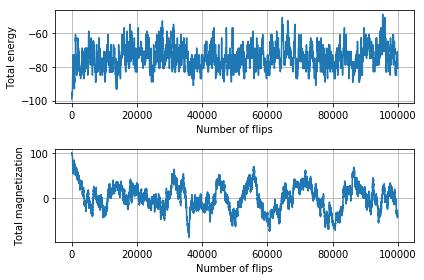

In [19]:
# plot energy, magnetization
import matplotlib.pyplot as plt
plt.figure()

plt.subplot(211)
plt.plot(energy)
plt.grid()
plt.xlabel("Number of flips")
plt.ylabel("Total energy")

plt.subplot(212)
plt.plot(magnet)
plt.grid()
plt.xlabel("Number of flips")
plt.ylabel("Total magnetization")

plt.tight_layout()
plt.show()

## Simulated annealing

### Das Spiel

* Using Monte Carlo simulations to find GLOBAL minima/maxima.
* In week 4 we talked about ways of finding local minima (e.g. golden ratio search).
* How it works:  rewrite max/min problem as looking for a "ground state energy" of a system.
    * Function $f$ that you want the max/min of: make this the energy function.
    * how could you find ground state: reduce temperature until you reach the ground state.

* Issue: if you reduce temperature too quickly: might get caught in a local min instead of the global min.
* Solution: reduce temperature slowly.  This way system has time to explore many microstates and find a good approximation to the global minimum.
* Visual Analogy: particle in a bumpy potential. Too low energy: get stuck in nearest local minimum.  Keep low energy but allow some random 'kicks' in energy: can kick out of local minimum and continue heading to global minimum (see https://commons.wikimedia.org/wiki/File:Hill_Climbing_with_Simulated_Annealing.gif#/media/File:Hill_Climbing_with_Simulated_Annealing.gif ).
![By Kingpin13 - Own work, CC0, https://commons.wikimedia.org/w/index.php?curid=25010763](Hill_Climbing_with_Simulated_Annealing.gif)

### Example: travelling salesman

* Famous NP-hard problem (https://en.wikipedia.org/wiki/NP-hardness ): what is the shortest route to visit a given set of locations on a map?
* Want global minimum of distance
* Start with random route, swap 2 cities, use Metropolis algorithm to determine whether to keep the swap
* "energy" in this case is the total distance of the route
* You can explore this problem using code from the book (`salesman.py`).
![Newman's fig. 10.6](fig10-6.png)

<font size="32">**Fill out the online evaluations!!!**</font>